In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

###Características
El conjunto de datos está compuesto por 13 características adicionales que describen las condiciones de salud de cada uno de los pacientes. Estas características se describen a continuación:

-**age** : edad del paciente --> numérica

-**sex** : sexo del paciente --> categórica
0: mujer
1: hombre

-**cp**: tipo de dolor de pecho --> categórica
1. angina típica
2. angina atípica
3. dolor no-anginoso
4. asintomático

-**trestbps**: presión arterial en reposo (en mm Hg al ingreso en el hospital) --> numérica

-**chol**: colesterol sérico en mg/dl --> numérica

-**fbs** : dolor provocado por el esfuerzo (1 = sí; 0 = no) --> categórica

-**restecg**: resultados electrocardiográficos en reposo --> categórica
0. normal
1. presenta anormalidad de la onda ST-T
2. presenta probable o definida hipertrofia ventricular izquierda

-**thalach**: frecuencia cardiaca en reposo --> numérica

-**exang**: angina inducida por el ejercicio (1 = sí; 0 = no) --> categórica

-**oldpeak**: depresión del ST inducida por el ejercicio en relación con el reposo --> numérica

-**slope**: la pendiente del segmento ST en ejercicio máximo --> categórica
1. pendiente ascendente
2. plano
3. pendiente descendente

-**ca**: número de vasos mayores (0-3) coloreados por flouroscopia --> categórica

-**thal**  --> categórica
thal representa información sobre el flujo sanguíneo relacionado con el tejido del corazón detectada durante las pruebas médicas. Es una variable categórica que puede tomar los siguientes valores:

- 3: Normal (sin defectos detectados en el flujo sanguíneo).
- 6: Defecto fijo (un área del corazón tiene flujo sanguíneo reducido permanentemente).
- 7: Defecto reversible (un área del corazón tiene flujo sanguíneo reducido temporalmente, normalmente durante el esfuerzo físico).

## DATASET

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Definir la ruta al archivo dentro de Google Drive
file_path = '/content/drive/My Drive/IA_PROJECT_1_EDU/train.csv'
data = pd.read_csv(file_path)

In [19]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-1,-1,7.0,2
2,63.0,1.0,4.0,140.0,NaN,NaN,2.0,149.0,0,2.0,1,NaN,NaN,2
3,52.0,0.0,2.0,140.0,-1.0,0.0,0.0,140.0,0.0,0.0,-1,-1,-1,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46.0,1.0,3.0,120.0,230.0,0.0,0.0,150.0,0.0,0.0,-1,-1,-1,0
728,62.0,1.0,3.0,NaN,204.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
729,43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0,0
730,68.0,1.0,3.0,150.0,195.0,1,0.0,132.0,0,0.0,NaN,NaN,6,1


In [5]:
data['label'].value_counts()

,count
label,
0,327
1,156
2,108
3,107
4,34


Vemos que nuestro dataset está desbalanceado

In [6]:
print(data.dtypes)

age         float64
sex         float64
cp          float64
trestbps     object
chol         object
fbs          object
restecg     float64
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
label         int64
dtype: object


In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


In [9]:
# Vemos que tenemos '?', '0' y '-9', para muchas columnas --> Lo pasamos a valores NaN
# Reemplazar '?' y '-9' (como float, int o str) por NaN en las columnas especificadas
columns_to_clean = ['trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
data[columns_to_clean] = data[columns_to_clean].replace(['?'], pd.NA)
data[columns_to_clean] = data[columns_to_clean].replace([-9, '-9', '-9.0', -9.0], -1)

In [10]:
# Asegurarse de que las columnas tengan el tipo de datos correcto

# Convertir las columnas numéricas a tipo float64
data['age'] = pd.to_numeric(data['age'], errors='coerce')  # 'age' como numérica
data['trestbps'] = pd.to_numeric(data['trestbps'], errors='coerce')  # 'trestbps' como numérica
data['chol'] = pd.to_numeric(data['chol'], errors='coerce')  # 'chol' como numérica
data['thalach'] = pd.to_numeric(data['thalach'], errors='coerce')  # 'thalach' como numérica
data['oldpeak'] = pd.to_numeric(data['oldpeak'], errors='coerce')  # 'oldpeak' como numérica

# Convertir las columnas categóricas (objetos) a tipo 'category' o 'int' donde corresponda
data['sex'] = data['sex'].astype('category')  # 'sex' como categórica
data['cp'] = data['cp'].astype('category')  # 'cp' como categórica
data['fbs'] = data['fbs'].astype('category')  # 'fbs' como categórica
data['restecg'] = data['restecg'].astype('category')  # 'fbs' como categórica
data['exang'] = data['exang'].astype('category')  # 'exang' como categórica
data['slope'] = data['slope'].astype('category')  # 'slope' como categórica
data['ca'] = data['ca'].astype('category')  # 'ca' como categórica
data['thal'] = data['thal'].astype('category')  # 'thal' como categórica
print(data.dtypes)

age          float64
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
label          int64
dtype: object


In [11]:
# Reemplazar valores 0 en la columna 'trestbps' por la mediana de la columna
trestbps_median = data.loc[data['trestbps'] != 0, 'trestbps'].median()  # Calcular la mediana sin contar los ceros
data['trestbps'] = data['trestbps'].replace(0, trestbps_median)


In [12]:
# Contar los valores '?' y '-9' y '0' por separado en cada columna
count_question_marks = (data == '?').sum()
count_minus_one = ((data == -1.0) | (data == '-1.0')).sum()  # Se compara tanto con -9 como con '-9.0' como texto
count_0 =  ((data == 0) | (data == '0')).sum()  # Se compara tanto con -9 como con '-9.0' como texto

# Crear un DataFrame con los resultados
count_table = pd.DataFrame({
    'Cuenta de "?":': count_question_marks,
    'Cuenta de "-1":': count_minus_one,
    'Cuenta de "0"': count_0
})

# Mostrar la tabla
print(count_table)

          Cuenta de "?":  Cuenta de "-1":  Cuenta de "0"
age                    0                0              0
sex                    0                0            154
cp                     0                0              0
trestbps               0                0              0
chol                   0               16            135
fbs                    0                8            139
restecg                0                0            439
thalach                0                0              0
exang                  0                0             95
oldpeak                0                2            297
slope                  0              152              0
ca                     0              230              2
thal                   0              210              0
label                  0                0            327


In [13]:
data['chol'] = data['chol'].replace(0, np.nan)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       732 non-null    float64 
 1   sex       732 non-null    category
 2   cp        732 non-null    category
 3   trestbps  685 non-null    float64 
 4   chol      592 non-null    float64 
 5   fbs       674 non-null    category
 6   restecg   732 non-null    category
 7   thalach   688 non-null    float64 
 8   exang     688 non-null    category
 9   oldpeak   683 non-null    float64 
 10  slope     637 non-null    category
 11  ca        483 non-null    category
 12  thal      563 non-null    category
 13  label     732 non-null    int64   
dtypes: category(8), float64(5), int64(1)
memory usage: 42.1 KB


**Ya tenemos el DATASET limpio, a partir de ahora para cada cambio lo iremos guardando en con otro nombre**
- En chol tenemos 135 '0' y no deberiamos tener ninguno
- En oldpeak que significa un 0 ?
  

In [15]:
data.describe()

,age,trestbps,chol,thalach,oldpeak,label
count,732.000000,685.000000,592.000000,688.000000,683.000000,732.000000
mean,53.364754,132.164964,240.123311,138.132267,0.881259,1.132514
std,9.306868,18.527613,71.602801,25.963443,1.112960,1.257615
min,28.000000,92.000000,-1.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,206.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,140.000000,0.500000,1.000000
75%,60.000000,140.000000,277.000000,158.250000,1.550000,2.000000
max,76.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
for col in data.columns:
    print(f"Valores únicos en la columna {col} (ordenados ascendentemente):")
    try:
        # Convertir los valores a string para evitar problemas de comparación
        unique_values = data[col].unique()
        sorted_values = sorted(unique_values, key=lambda x: (str(x)))
        print(sorted_values)
    except Exception as e:
        print(f"No se pudieron ordenar los valores de la columna {col} debido a: {e}")
    print()  # Línea en blanco para separar cada columna



Valores únicos en la columna age (ordenados ascendentemente):
[28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0]

Valores únicos en la columna sex (ordenados ascendentemente):
[0.0, 1.0]

Valores únicos en la columna cp (ordenados ascendentemente):
[1.0, 2.0, 3.0, 4.0]

Valores únicos en la columna trestbps (ordenados ascendentemente):
[100.0, 102.0, 104.0, 105.0, 106.0, 108.0, 110.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 120.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 130.0, 132.0, 134.0, 135.0, 136.0, 138.0, 140.0, 142.0, 144.0, 145.0, 146.0, 148.0, 150.0, 152.0, 154.0, 155.0, 158.0, 160.0, 164.0, 165.0, 170.0, 172.0, 174.0, 178.0, 180.0, 185.0, 190.0, 192.0, 200.0, 92.0, 94.0, 95.0, 96.0, 98.0, nan]

Valores únicos en la col

### Eliminamos duplicados

In [ ]:
# # Número de filas antes de eliminar duplicados
# filas_antes = data.shape[0]

# # Eliminar duplicados
# data = data.drop_duplicates()

# # Número de filas después de eliminar duplicados
# filas_despues = data.shape[0]

# # Calcular cuántas filas se eliminaron
# filas_eliminadas = filas_antes - filas_despues

# print(f"Se han eliminado {filas_eliminadas} filas duplicadas.")


### Arreglamos las columnas con mezcla de float e int

In [ ]:
# columns_to_fix = ['fbs', 'exang', 'slope', 'ca', 'thal']

# # Convertir las columnas a enteros, manejando cadenas y NaN
# for col in columns_to_fix:
#     data[col] = data[col].apply(lambda x: int(float(x)) if pd.notna(x) else x)


In [ ]:
# for col in data.columns:
#     print(f"Valores únicos en la columna {col} (ordenados ascendentemente):")
#     try:
#         # Convertir los valores a string para evitar problemas de comparación
#         unique_values = data[col].unique()
#         sorted_values = sorted(unique_values, key=lambda x: (str(x)))
#         print(sorted_values)
#     except Exception as e:
#         print(f"No se pudieron ordenar los valores de la columna {col} debido a: {e}")
#     print()  # Línea en blanco para separar cada columna

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       732 non-null    float64 
 1   sex       732 non-null    category
 2   cp        732 non-null    category
 3   trestbps  685 non-null    float64 
 4   chol      592 non-null    float64 
 5   fbs       674 non-null    category
 6   restecg   732 non-null    category
 7   thalach   688 non-null    float64 
 8   exang     688 non-null    category
 9   oldpeak   683 non-null    float64 
 10  slope     637 non-null    category
 11  ca        483 non-null    category
 12  thal      563 non-null    category
 13  label     732 non-null    int64   
dtypes: category(8), float64(5), int64(1)
memory usage: 42.1 KB


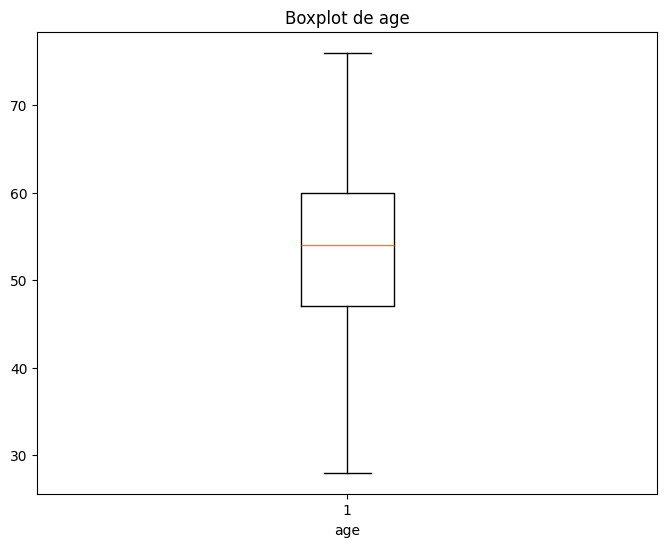

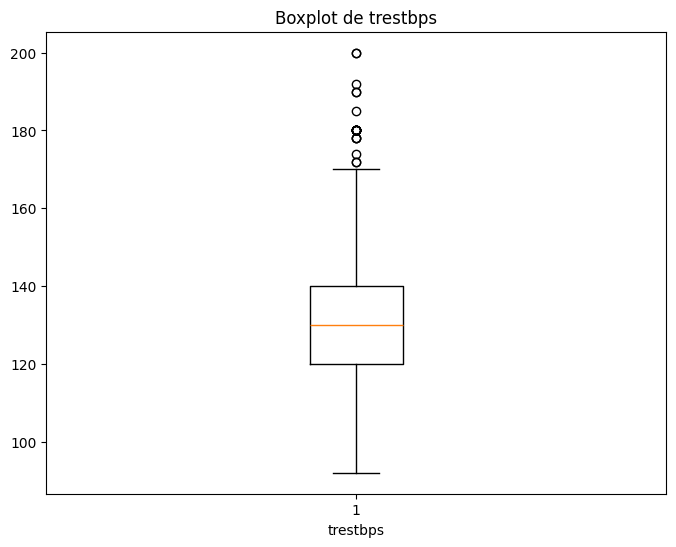

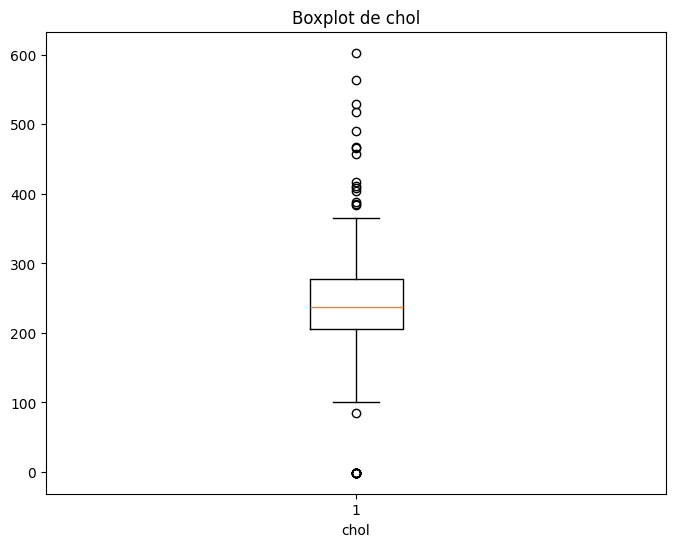

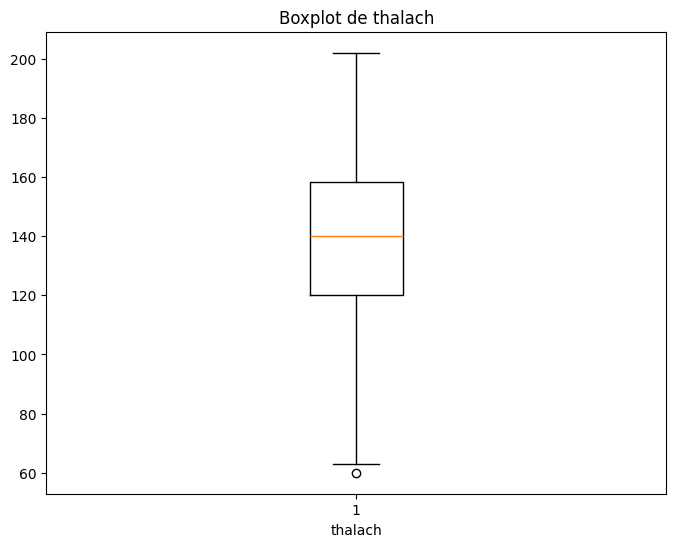

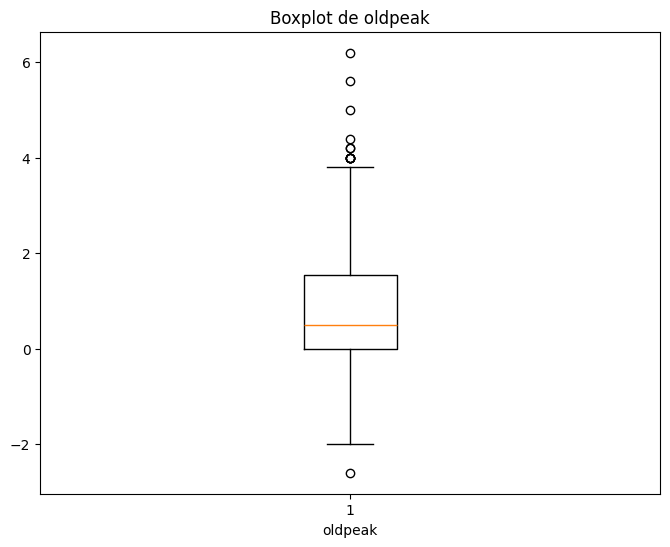

In [ ]:
import matplotlib.pyplot as plt
# Boxplot para variables numéricas

# Lista de variables numéricas
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Crear boxplots univariantes para cada variable numérica
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[col].dropna(), vert=True)  # Eliminar valores NaN para evitar errores
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()


Chol y oldpeak, son las numéricas que menos siguen una normal, ya que también hay mas diferencia entre media y mediana

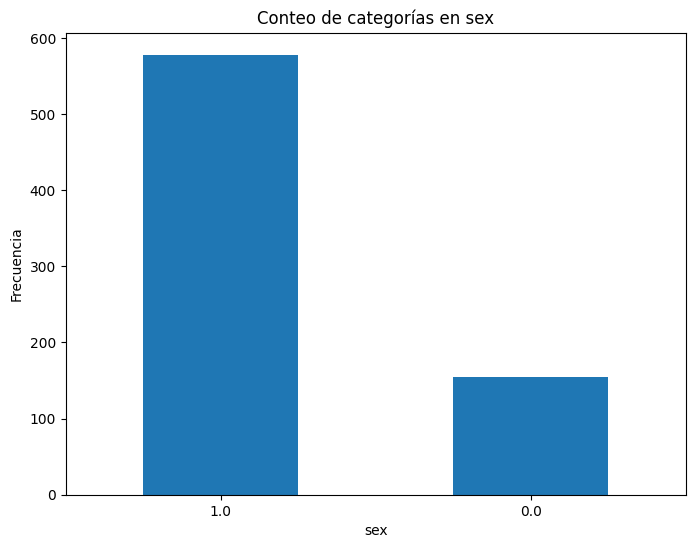

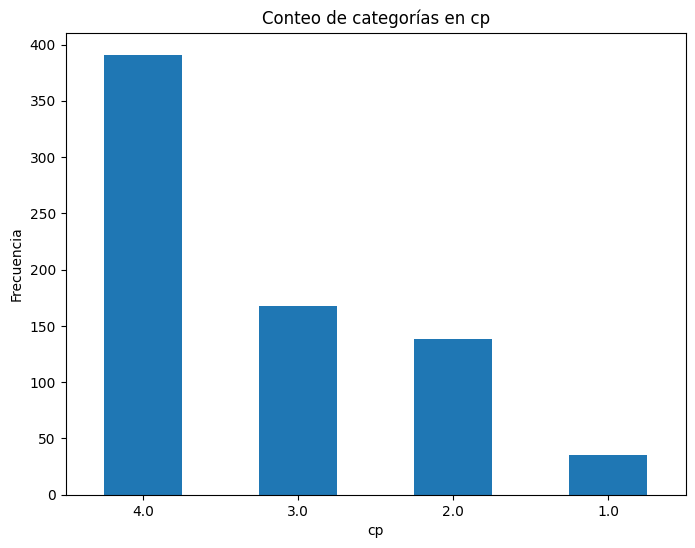

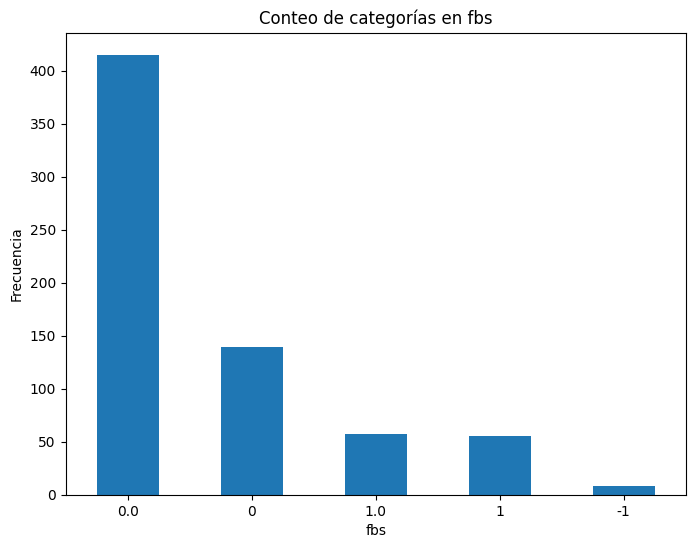

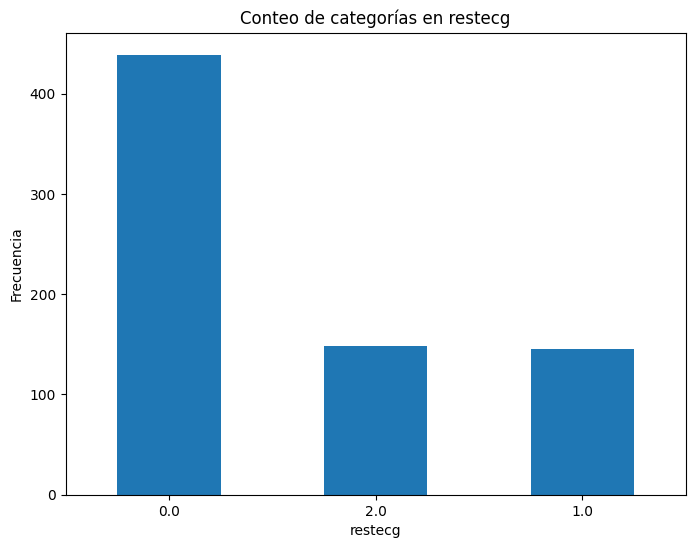

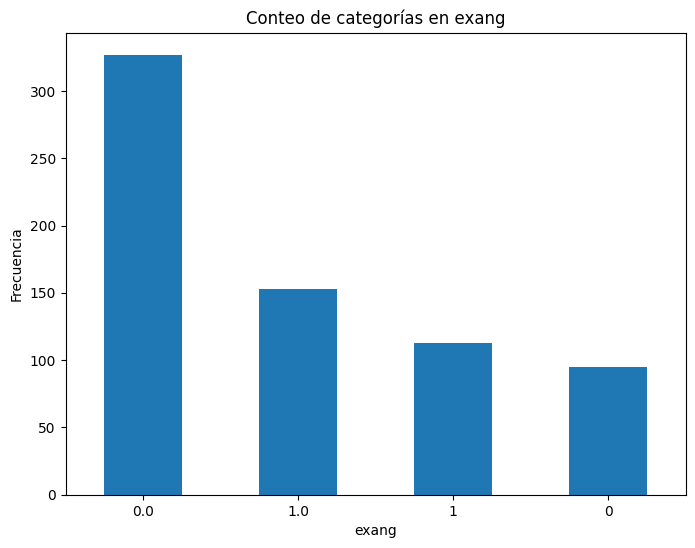

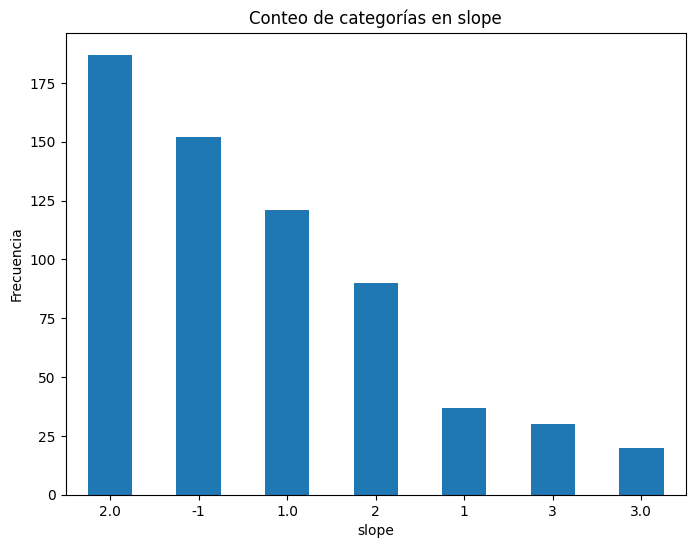

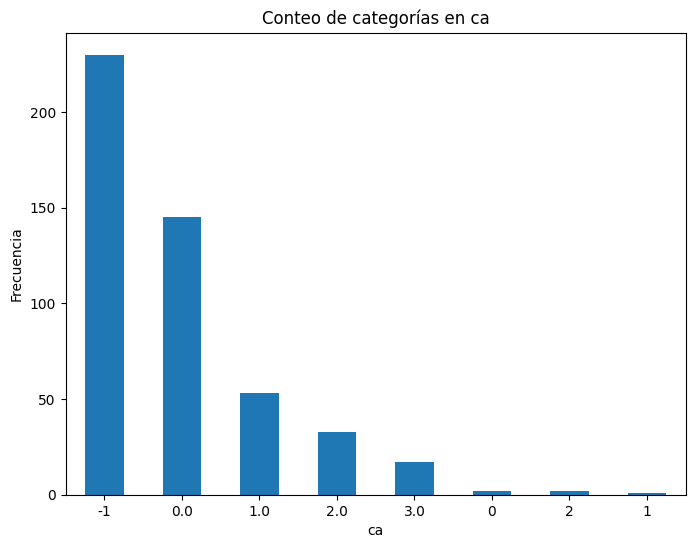

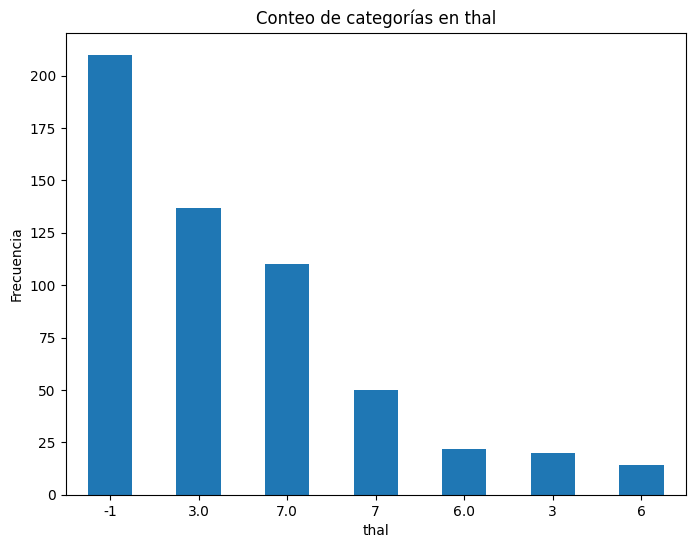

In [ ]:
import matplotlib.pyplot as plt

# Lista de variables categóricas
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Crear gráficos de barras para cada variable categórica
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Conteo de categorías en {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.show()


Vemos que la mayoría de las categóricas no están balanceadas tampoco

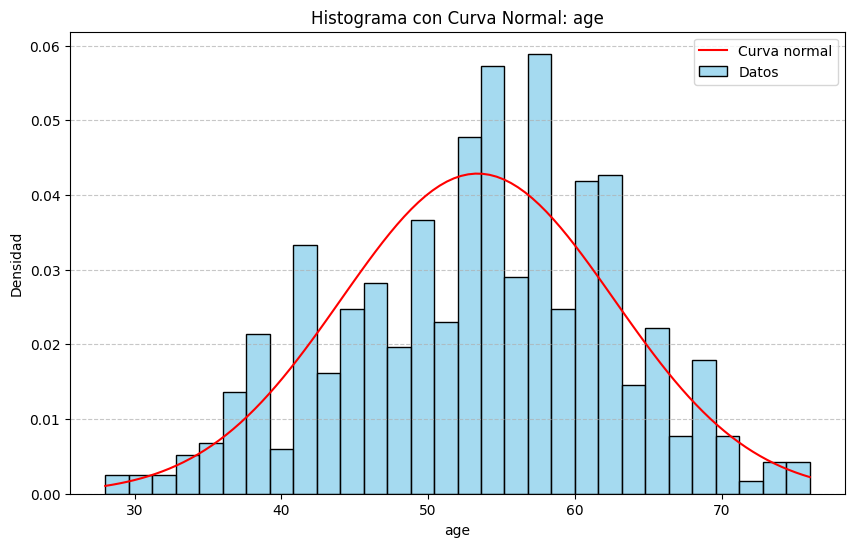

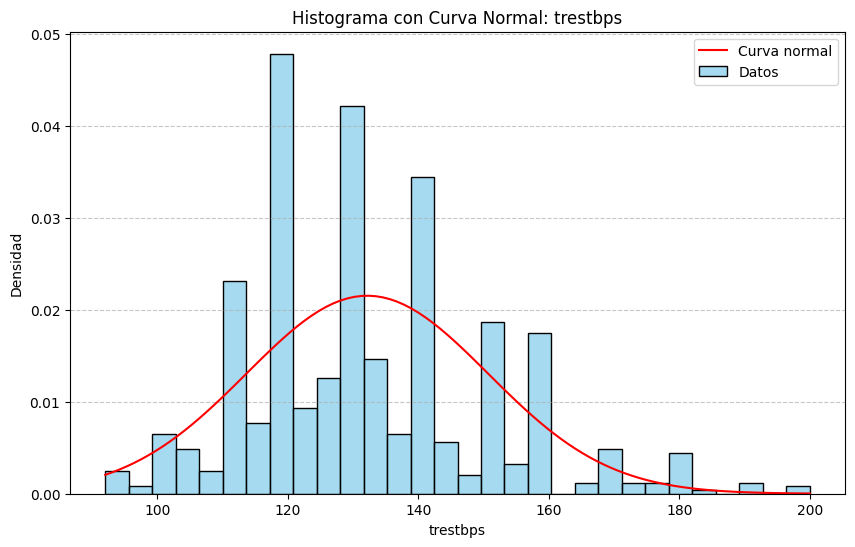

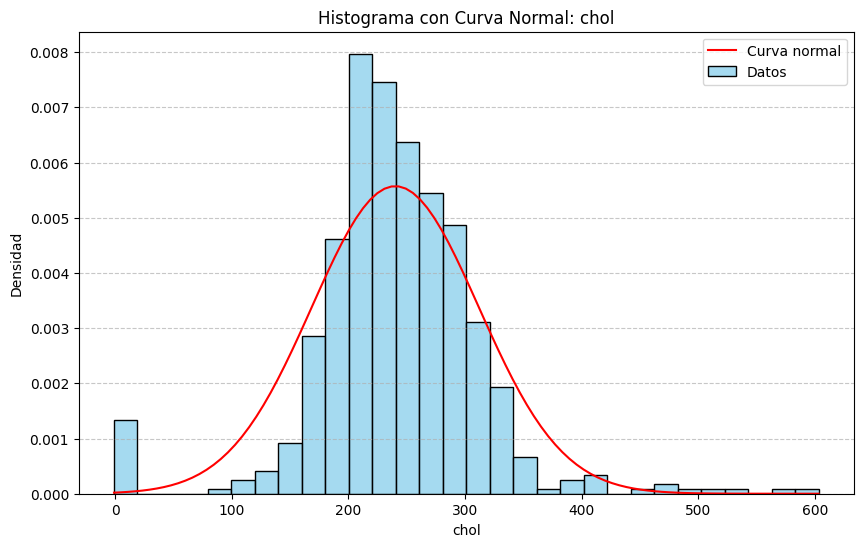

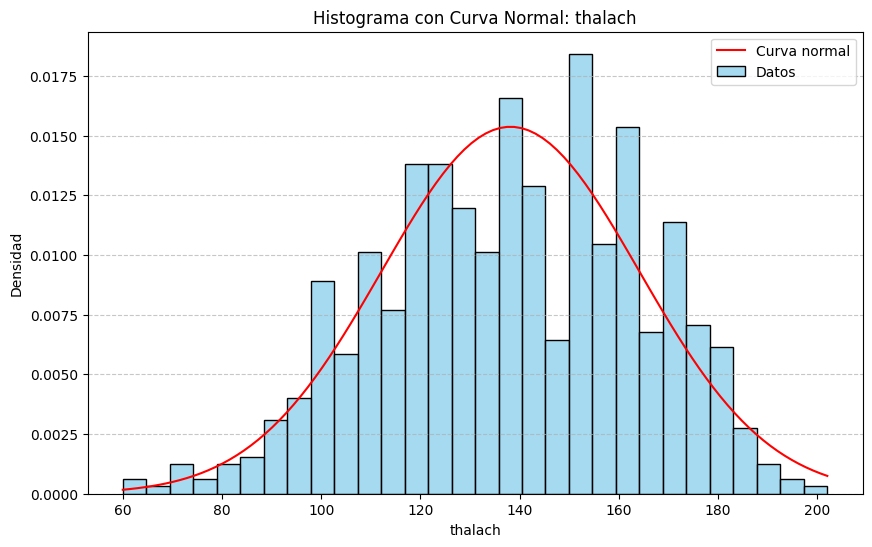

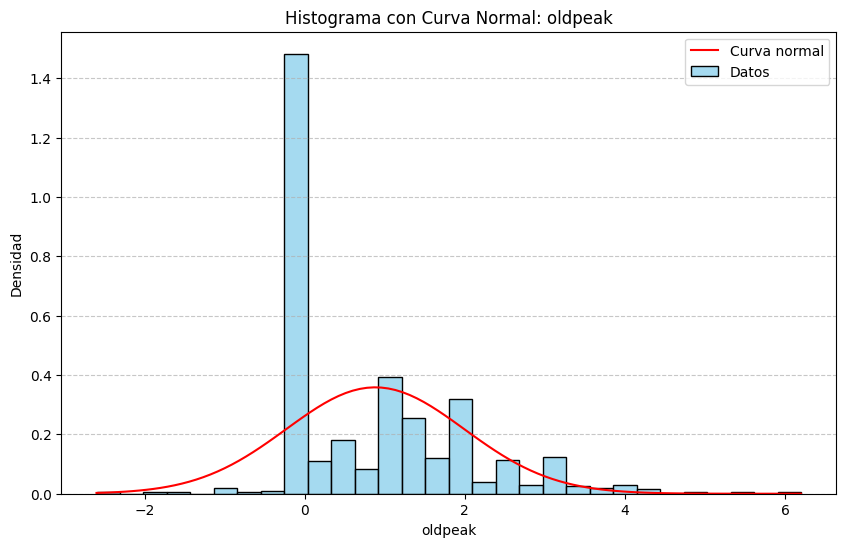

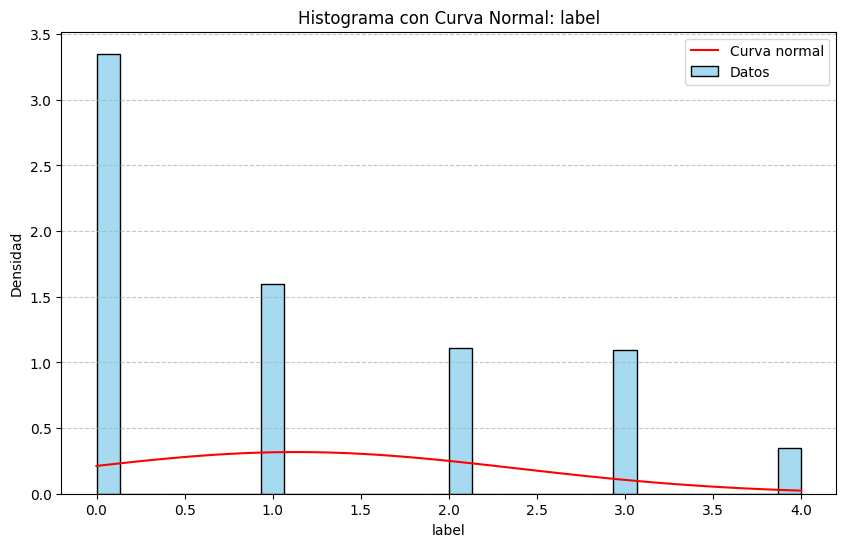

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

# Seleccionar las columnas numéricas
numeric_columns = data.select_dtypes(include=['float', 'int']).columns

# Crear histogramas con la curva de la normal para cada columna numérica
for col in numeric_columns:
    plt.figure(figsize=(10, 6))

    # Histograma de la columna
    sns.histplot(data[col].dropna(), kde=False, stat='density', bins=30, color='skyblue', label='Datos')

    # Ajustar una distribución normal a los datos
    mean, std = data[col].mean(), data[col].std()
    x = np.linspace(data[col].min(), data[col].max(), 100)
    plt.plot(x, norm.pdf(x, mean, std), color='red', label='Curva normal')

    # Personalización del gráfico
    plt.title(f'Histograma con Curva Normal: {col}')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


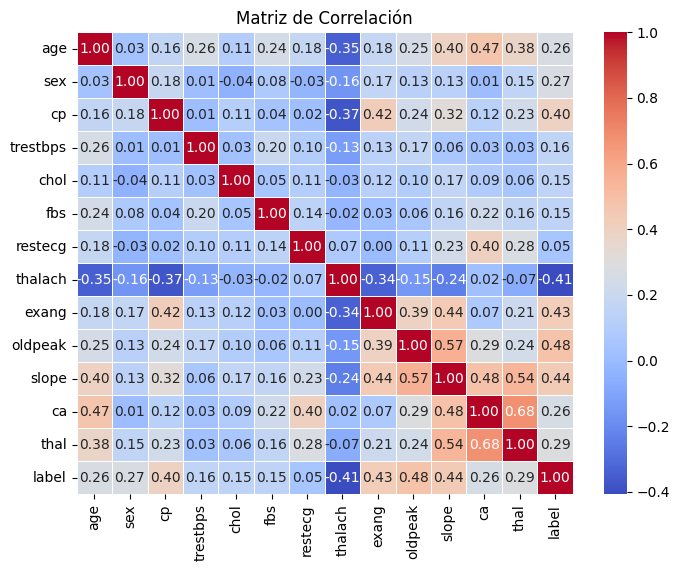

In [ ]:
# Gráfica de correlacion entre label y el resto de variables

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()



<ipython-input-52-0c9c92cdeec8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='age', data=data, palette='Set2')


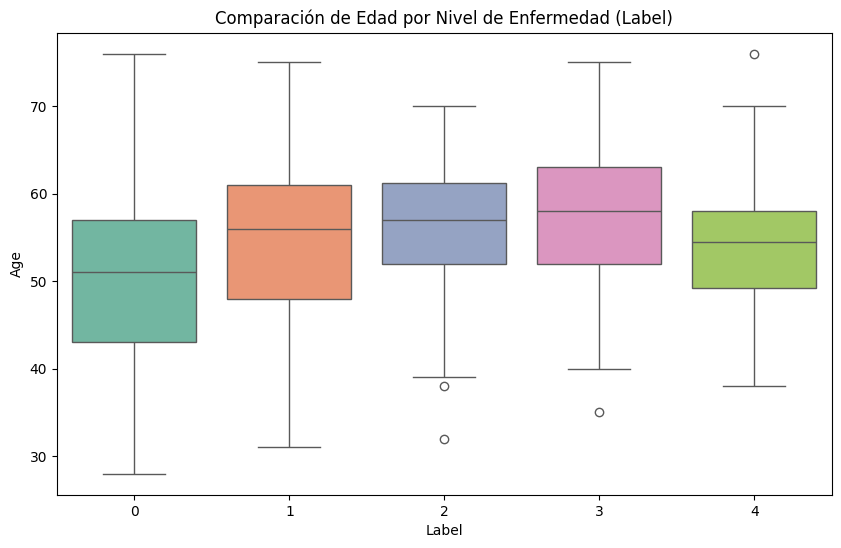

In [ ]:
# Gráfico comparativo entre 'age' y 'label'
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='age', data=data, palette='Set2')
plt.title('Comparación de Edad por Nivel de Enfermedad (Label)')
plt.xlabel('Label')
plt.ylabel('Age')
plt.show()


Esta gráfica nos sugiere que para los jóvenes entre 0 y 35 años no hay gente que se encuentre entre el (2,3,4) por lo que la edad puede ser significativo para esto. La mediana para el 2 y 3 sube, pero luego para el 4 baja un poco.
La edad se puede dividir en estos grupos:
- Jóvenes --> 0-35
- Adultos --> 35-50
- Adultos mayores --> 50-60
- Tercera edad -- > 60 en adelante

GRÁFICO COMPARATIVO ENTRE EL LABEL Y EL SEXO

In [16]:
# Contar etiquetas (label) por sexo
label_count_by_sex = data.groupby('sex')['label'].value_counts().unstack()
label_count_by_sex


<ipython-input-16-18d77c2f717d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  label_count_by_sex = data.groupby('sex')['label'].value_counts().unstack()


label,0,1,2,3,4
sex,,,,,
0.0,115,19,9,8,3
1.0,212,137,99,99,31


GRÁFICAS PARA CADA FEATURE POR LABEL Y POR SEX = 0

<ipython-input-17-750bc0a933c6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=data_sex_0, palette='viridis')


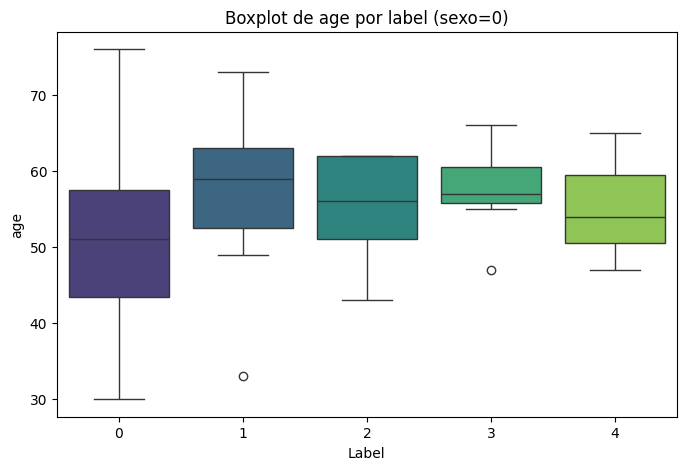

<ipython-input-17-750bc0a933c6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=data_sex_0, palette='viridis')


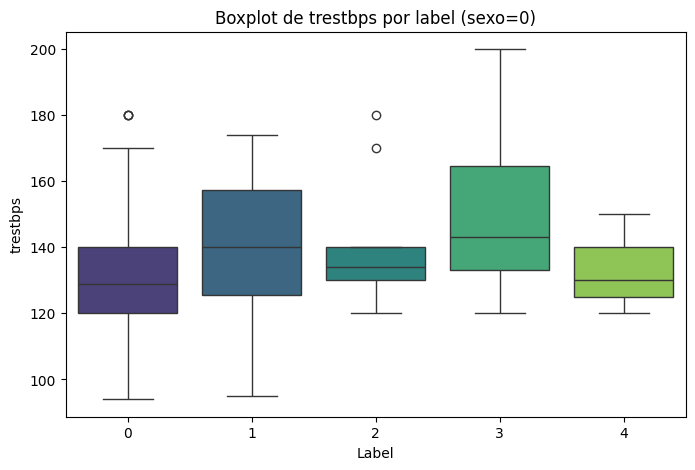

<ipython-input-17-750bc0a933c6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=data_sex_0, palette='viridis')


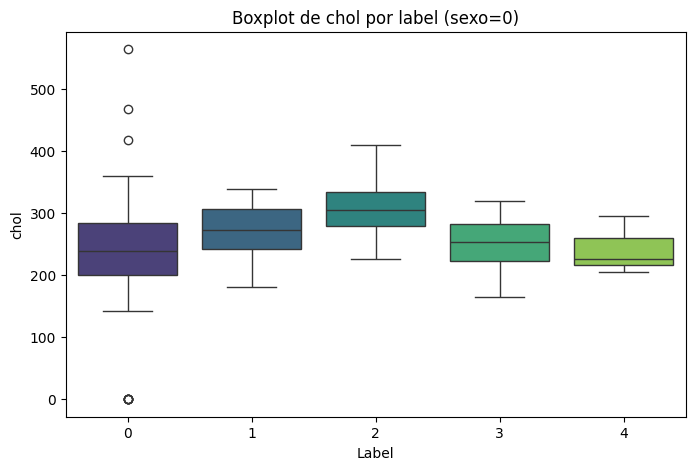

<ipython-input-17-750bc0a933c6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=data_sex_0, palette='viridis')


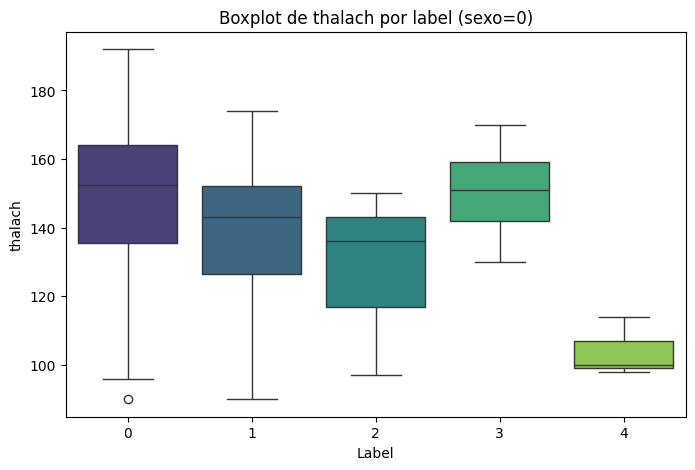

<ipython-input-17-750bc0a933c6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=data_sex_0, palette='viridis')


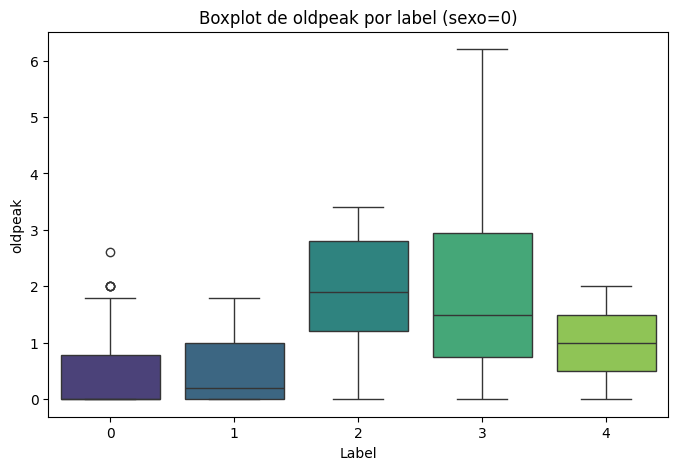

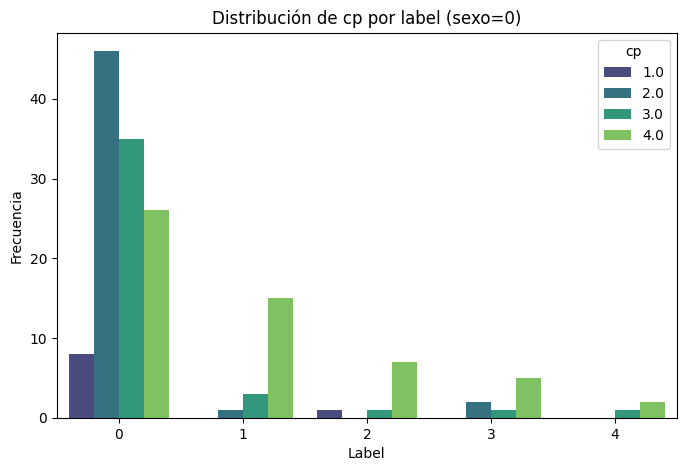

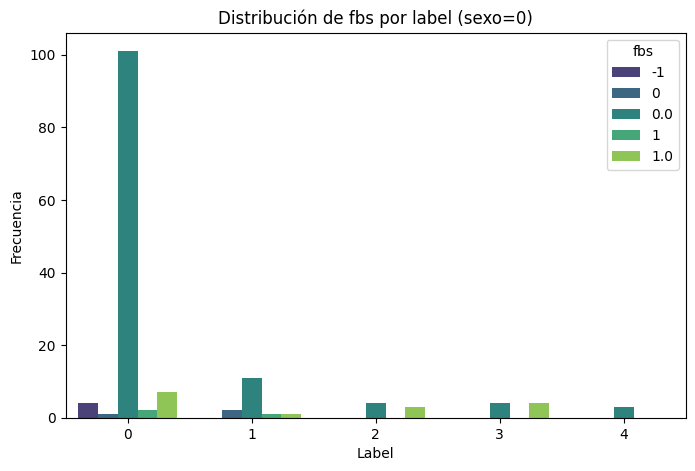

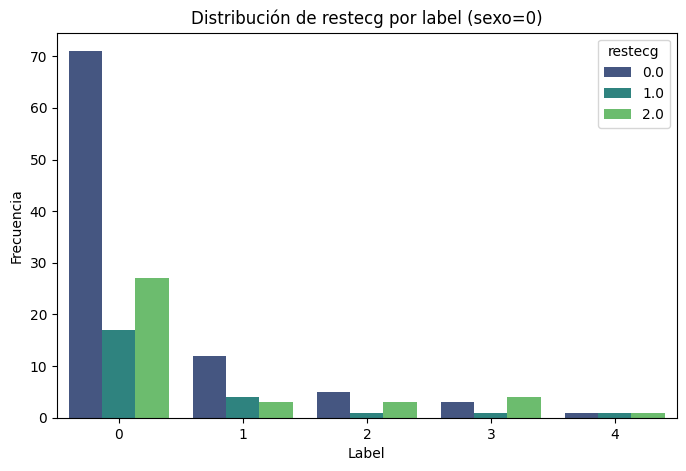

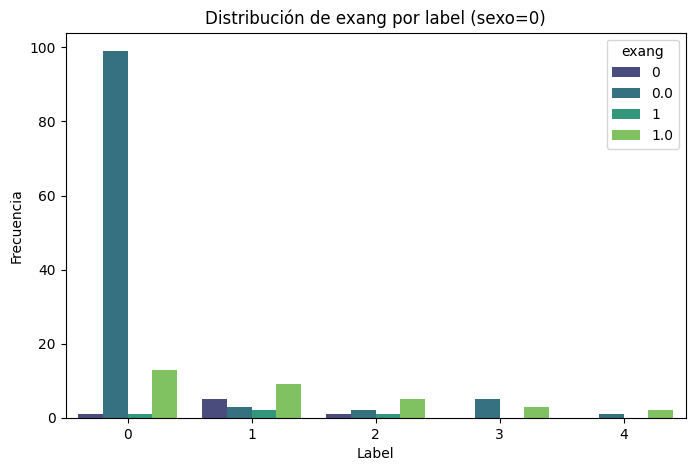

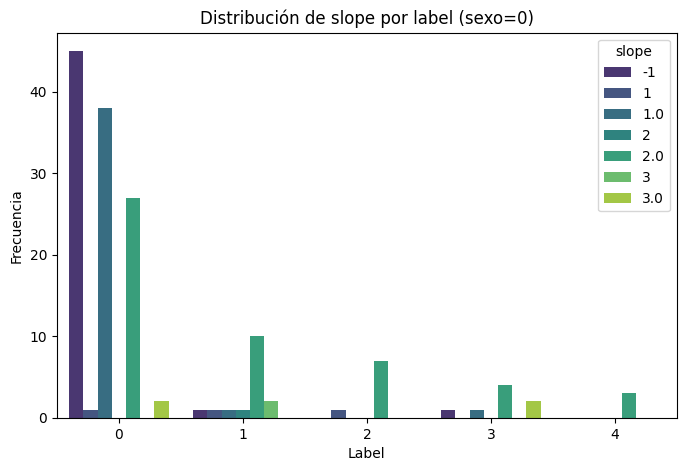

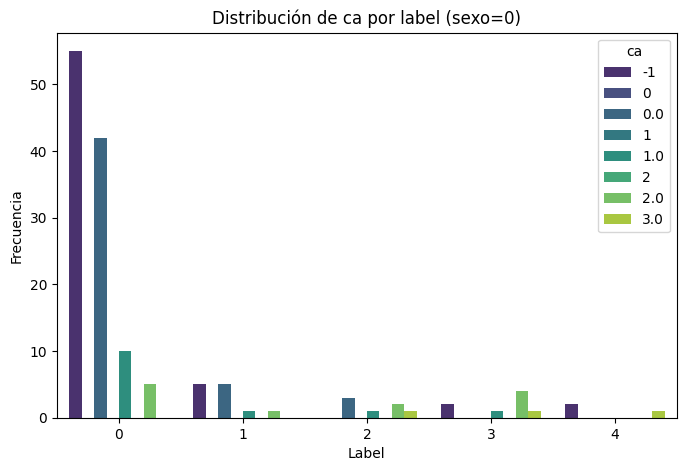

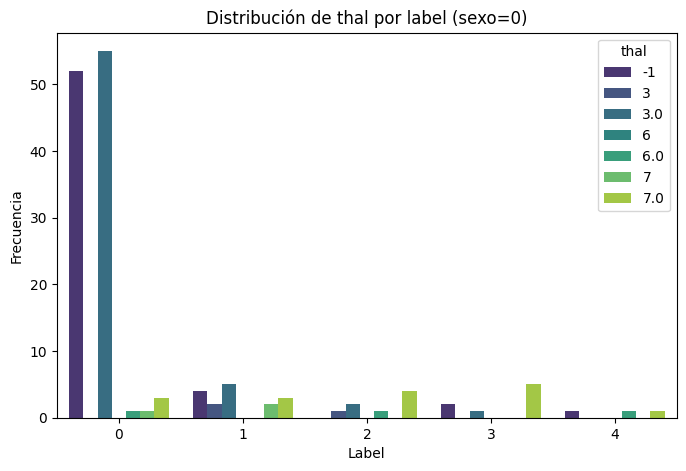

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas y categóricas
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_columns = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Filtrar datos donde sex == 0
data_sex_0 = data[data['sex'] == 0]

# Graficar boxplots para las columnas numéricas por label
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='label', y=col, data=data_sex_0, palette='viridis')
    plt.title(f"Boxplot de {col} por label (sexo=0)")
    plt.xlabel("Label")
    plt.ylabel(col)
    plt.show()

# Graficar gráficos de barras para las columnas categóricas por label
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='label', hue=col, data=data_sex_0, palette='viridis')
    plt.title(f"Distribución de {col} por label (sexo=0)")
    plt.xlabel("Label")
    plt.ylabel("Frecuencia")
    plt.legend(title=col, loc="upper right")
    plt.show()


## Saco una grafica que me saque la relacion entre los outliers y las etiquetas

PARA VER SI TIENE RELACION QUE LOS OUTLIERS SEAN DE CLASE 3 0 4 (ESTÁN GRAVES)

In [ ]:
import pandas as pd

# Función para contar outliers en cada etiqueta
def contar_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Límites para identificar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Crear una columna booleana indicando si el valor es un outlier
    data[f'{col}_outlier'] = (data[col] < lower_bound) | (data[col] > upper_bound)

    # Contar outliers por etiqueta
    outliers_por_label = data.groupby('label')[f'{col}_outlier'].sum()

    return outliers_por_label

# Lista de columnas numéricas
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Crear un DataFrame para almacenar los resultados
outlier_summary = pd.DataFrame()

# Contar outliers para cada columna y etiqueta
for col in numeric_columns:
    outliers_por_label = contar_outliers(data, col)
    outlier_summary[col] = outliers_por_label

# Mostrar el resumen de outliers por etiqueta y columna
print("Resumen de Outliers por Etiqueta:")
print(outlier_summary)



Resumen de Outliers por Etiqueta:
       age  trestbps  chol  thalach  oldpeak
label                                       
0        0         9     7        0        1
1        0         6     2        0        1
2        0         1     3        1        0
3        0         6     3        0        7
4        0         1     1        0        4


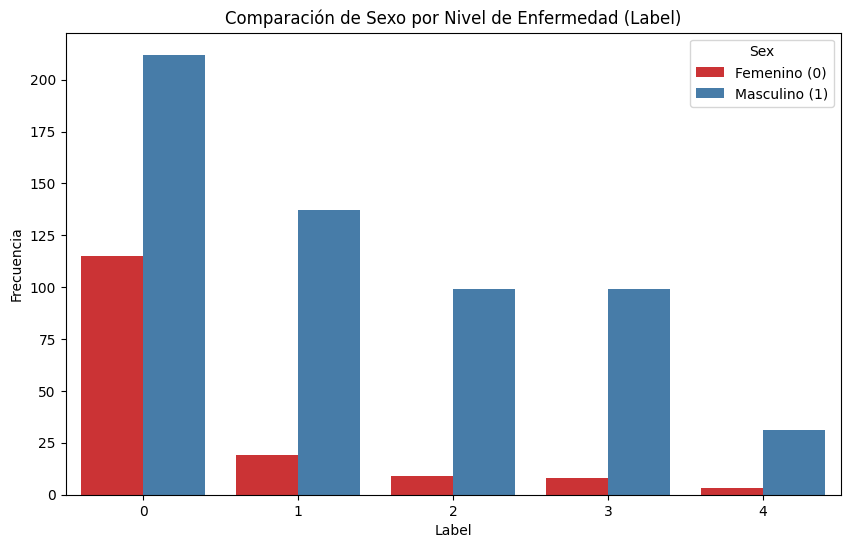

In [ ]:
# Gráfico comparativo entre 'sex' y 'label'
plt.figure(figsize=(10, 6))
sns.countplot(x='label', hue='sex', data=data, palette='Set1')
plt.title('Comparación de Sexo por Nivel de Enfermedad (Label)')
plt.xlabel('Label')
plt.ylabel('Frecuencia')
plt.legend(title='Sex', labels=['Femenino (0)', 'Masculino (1)'])
plt.show()


In [ ]:
data['sex'].value_counts()

,count
sex,
1.0,578
0.0,154


La gráfica del sexo no es muy trascendental, porque esta muy desbalanceado el sexo. Pero si se puede ver que para el sexo 0 la mayoría estan sanas

In [ ]:
# Crear una tabla de distribución de 'label' para sexo = 0 (mujer)
label_distribution_female = data[data['sex'] == 0]['label'].value_counts().sort_index()

# Convertirlo a un DataFrame para mejor visualización
label_distribution_table = label_distribution_female.reset_index()
label_distribution_table.columns = ['Label', 'Count']

# Mostrar la tabla
print(label_distribution_table)


   Label  Count
0      0    115
1      1     19
2      2      9
3      3      8
4      4      3


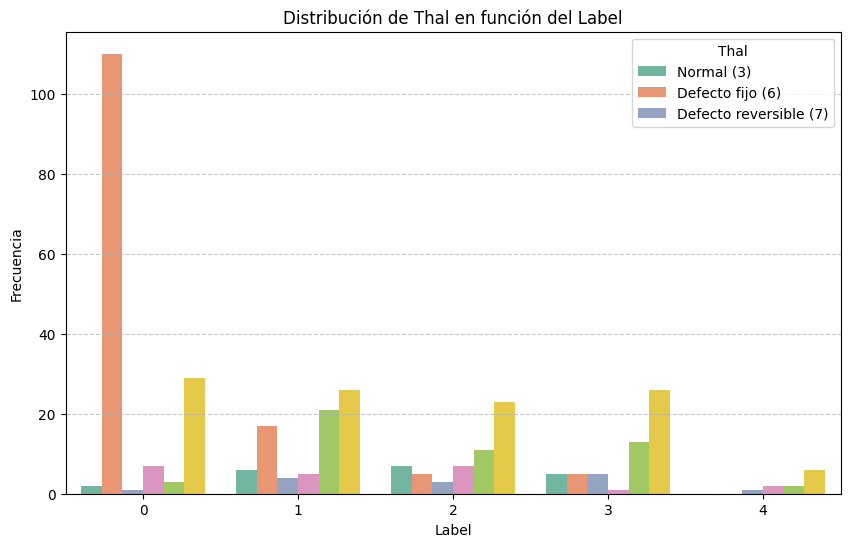

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras para la variable 'thal' en función de 'label'
plt.figure(figsize=(10, 6))
sns.countplot(x='label', hue='thal', data=data, palette='Set2')
plt.title('Distribución de Thal en función del Label')
plt.xlabel('Label')
plt.ylabel('Frecuencia')
plt.legend(title='Thal', labels=['Normal (3)', 'Defecto fijo (6)', 'Defecto reversible (7)'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Defecto fijo es peor que defecto reversible

In [ ]:
# Descargo el csv con Nan para poder probar con mas notebooks

# Guardar el dataset en un archivo CSV
file_path = '/content/drive/My Drive/IA_PROJECT_1_EDU/dataset_con_nan.csv'
data.to_csv(file_path, index=False)



# DATASET 1 --> RELLENANDO CON VALORES DE MODA, MEDIA Y MEDIANA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
data_moda_media = data

In [ ]:
# RELLENAMOS NUMERICOS CON MEDIA O CATEGORICOS CON MEDIANA

# Rellenar NaN en columnas de tipo float con la media
for col in data_moda_media.select_dtypes(include=['float']):
    data_moda_media[col] = data_moda_media[col].fillna(data_moda_media[col].mean())

# Rellenar NaN en columnas de tipo category con la moda
for col in data_moda_media.select_dtypes(include=['category']):
    data_moda_media[col] = data_moda_media[col].fillna(data_moda_media[col].mode()[0])


In [ ]:
data_moda_media.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.000000,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.000000,0.0,0.0,150.0,1.0,1.5,2.0,0.0,7.0,2
2,63.0,1.0,4.0,140.0,246.821181,0.0,2.0,149.0,0,2.0,1,0.0,3.0,2
3,52.0,0.0,2.0,140.0,246.821181,0.0,0.0,140.0,0.0,0.0,2.0,0.0,3.0,0
4,55.0,1.0,4.0,140.0,217.000000,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3


In [ ]:
data_moda_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       732 non-null    float64 
 1   sex       732 non-null    category
 2   cp        732 non-null    category
 3   trestbps  732 non-null    float64 
 4   chol      732 non-null    float64 
 5   fbs       732 non-null    category
 6   restecg   732 non-null    category
 7   thalach   732 non-null    float64 
 8   exang     732 non-null    category
 9   oldpeak   732 non-null    float64 
 10  slope     732 non-null    category
 11  ca        732 non-null    category
 12  thal      732 non-null    category
 13  label     732 non-null    int64   
dtypes: category(8), float64(5), int64(1)
memory usage: 41.8 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear un LabelEncoder
encoder = LabelEncoder()

# Identificar columnas categóricas
columnas_categoricas = data_moda_media.select_dtypes(include=['object', 'category']).columns

# Aplicar LabelEncoder a cada columna categórica
for col in columnas_categoricas:
    data_moda_media[col] = encoder.fit_transform(data_moda_media[col])

data_moda_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    int64  
 2   cp        732 non-null    int64  
 3   trestbps  732 non-null    float64
 4   chol      732 non-null    float64
 5   fbs       732 non-null    int64  
 6   restecg   732 non-null    int64  
 7   thalach   732 non-null    float64
 8   exang     732 non-null    int64  
 9   oldpeak   732 non-null    float64
 10  slope     732 non-null    int64  
 11  ca        732 non-null    int64  
 12  thal      732 non-null    int64  
 13  label     732 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 80.2 KB


In [ ]:
# Selección de Características
X = data_moda_media.drop(columns =['label'])
y = data_moda_media['label']

len(X), len(y), X.iloc[0], y.iloc[0]



(732,
 732,
 age          51.0
 sex           1.0
 cp            0.0
 trestbps    125.0
 chol        213.0
 fbs           1.0
 restecg       2.0
 thalach     125.0
 exang         3.0
 oldpeak       1.4
 slope         1.0
 ca            3.0
 thal          1.0
 Name: 0, dtype: float64,
 0)

In [ ]:
# Hacemos un split de los datos
from sklearn.model_selection import train_test_split


X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Verificar
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(512, 13) (512,)
(110, 13) (110,)
(110, 13) (110,)


In [ ]:
X_train.iloc[0], y_train.iloc[0]

(age          59.000000
 sex           1.000000
 cp            3.000000
 trestbps    135.000000
 chol        246.821181
 fbs           0.000000
 restecg       0.000000
 thalach     115.000000
 exang         2.000000
 oldpeak       1.000000
 slope         2.000000
 ca            1.000000
 thal          4.000000
 Name: 223, dtype: float64,
 1)

In [ ]:
# Implementación de Regresión Logística
model = LogisticRegression(max_iter=1000)
#model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Predecir y Evaluar el Modelo
y_pred = model.predict(X_val)

len(y_pred), y_pred[0]

(110, 0)

In [ ]:
y_pred

array([0, 1, 3, 3, 3, 0, 0, 1, 0, 2, 0, 0, 3, 1, 0, 1, 3, 3, 1, 0, 0, 1,
       3, 0, 2, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 1, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 3,
       1, 1, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 3, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Evaluar el modelo
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"Precisión del modelo: {accuracy}")
print(f'F1-Score en el conjunto de validación: {f1}')



Precisión del modelo: 0.5454545454545454
F1-Score en el conjunto de validación: 0.5124233537723273


## Probamos ahora normalizando las variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar solo las columnas numéricas
numeric_columns = data_moda_media.select_dtypes(include=['float', 'int']).columns

# Crear el scaler
scaler = MinMaxScaler()

# Aplicar el escalado
data_moda_media[numeric_columns] = scaler.fit_transform(data_moda_media[numeric_columns])


In [ ]:
# Implementación de Regresión Logística
model = LogisticRegression(max_iter=1000)
#model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Predecir y Evaluar el Modelo
y_pred = model.predict(X_val)

len(y_pred), y_pred[0]

(110, 0)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Evaluar el modelo
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"Precisión del modelo: {accuracy}")
print(f'F1-Score en el conjunto de validación: {f1}')



Precisión del modelo: 0.5454545454545454
F1-Score en el conjunto de validación: 0.5124233537723273


## RANDOM FOREST

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score

from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_val)

# Evaluar el modelo
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"Precisión del modelo: {accuracy}")
print(f'F1-Score en el conjunto de validación: {f1}')

Precisión del modelo: 0.5363636363636364
F1-Score en el conjunto de validación: 0.5226569375722253


## XGBOOST

In [ ]:
from xgboost import XGBClassifier

# Crear el modelo de XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = xgb_model.predict(X_val)
print(y_pred)
# Evaluar el modelo
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='macro')

print(f"Precisión del modelo: {accuracy}")
print(f'F1-Score en el conjunto de validación: {f1}')
print("Recall:", recall)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:15:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0 1 1 3 0 0 0 2 0 3 0 0 3 2 0 1 3 4 2 0 0 2 3 0 2 2 3 3 0 0 1 3 0 0 1 0 2
 0 1 0 3 1 0 0 0 4 0 0 0 0 2 2 0 3 2 2 0 0 3 0 0 0 3 1 0 0 2 0 0 0 0 3 0 0
 3 0 2 0 0 0 0 0 0 0 1 2 0 2 1 1 0 1 0 1 0 0 3 0 0 0 1 1 3 0 0 3 0 3 0 0]
Precisión del modelo: 0.5909090909090909
F1-Score en el conjunto de validación: 0.5921545968156139
Recall: 0.4472873563218391


### GRID SEARCH CON XGBOOST

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score, recall_score
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits


def grid_search_example(X_train, y_train):
    # Definir el espacio de búsqueda para la búsqueda en cuadrícula
    param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [1.0, 1.5, 2.0]
}

    # Crear el clasificador XGB
    xgb = XGBClassifier()
    # Crear los scorers
    scorers = {
    'f1_score': make_scorer(f1_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro')
    }

    # Realizar la búsqueda en cuadrícula
    grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=scorers,       # Usar múltiples métricas
    refit='f1_score',      # Usar F1-score para seleccionar el mejor modelo
    cv=5,                  # Número de particiones para validación cruzada
    verbose=1,             # Nivel de detalle durante el proceso
    n_jobs=-1              # Usar todos los núcleos disponibles
)


    # Ajustar el modelo con los datos de entrenamiento
    grid_search.fit(X_train, y_train)


    # Devolver los resultados
    return grid_search.best_params_, grid_search.best_score_

In [ ]:
# Realizar búsqueda en cuadrícula
import time

start = time.perf_counter()
best_params_grid, best_score_grid = grid_search_example(X_train, y_train)
end = time.perf_counter()
time_grid_search = end - start

# Mostrar resultados
print("Resultados de la búsqueda en cuadrícula:")
print("Mejores parámetros:", best_params_grid)
print("Mejor puntuación (precisión):", best_score_grid)
print(f"Time taken is {time_grid_search:.6f} seconds.")
print()


Fitting 5 folds for each of 37500 candidates, totalling 187500 fits


In [ ]:
# Entrenamiento con búsqueda en cuadrícula
xgb_grid = XGBClassifier(**best_params_grid)
xgb_grid.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_grid = xgb_grid.predict(X_val)

# Evaluación del modelo con búsqueda en cuadrícula
accuracy_grid = accuracy_score(y_val, y_pred_grid)
f1_grid = f1_score(y_val, y_pred_grid, average='weighted')
recall_grid = recall_score(y_val, y_pred_grid, average='macro')

# Mostrar resultados comparativos
print("Resultados comparativos:")
print("Precisión con búsqueda en cuadrícula:", accuracy_grid)
print("F1 Score búsqueda en cuadrícula:", f1_grid)
print("Recall búsqueda en cuadrícula:", recall_grid)

NameError: name 'XGBClassifier' is not defined

## SUPER VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

# Crear el modelo de SVM
svm_model = SVC(kernel='rbf', C=1, random_state=42)

# Entrenar el modelo
svm_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = svm_model.predict(X_val)
print(y_pred)
# Evaluar el modelo
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='macro')  # 'macro' para considerar cada clase por igual
recall = recall_score(y_val, y_pred, average='macro')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 0.5272727272727272
F1 Score: 0.1380952380952381
Recall: 0.2


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Crear el modelo de KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors es el número de vecinos

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Hacer predicciones en X_val
y_pred = knn_model.predict(X_val)

# Evaluar el modelo
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='macro')  # 'macro' para considerar cada clase por igual
recall = recall_score(y_val, y_pred, average='macro')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)


Accuracy: 0.4636363636363636
F1 Score: 0.22767070328045938
Recall: 0.23783908045977015


## HACEMOS AHORA LOS CAMBIOS EN EL TEST

In [ ]:
# Definir la ruta al archivo dentro de Google Drive
file_path = '/content/drive/My Drive/IA_PROJECT_1_EDU/test.csv'
data_moda_media_test = pd.read_csv(file_path)

In [ ]:

# Asegurarse de aplicar el mismo preprocesamiento a los datos del conjunto de prueba que en los datos de entrenamiento

# Vemos que tenemos '?', '0' y '-9', para muchas columnas --> Lo pasamos a valores NaN
# Reemplazar '?' y '-9' (como float, int o str) por NaN en las columnas especificadas
columns_to_clean = ['trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'restecg']
data_moda_media_test[columns_to_clean] = data_moda_media_test[columns_to_clean].replace(['?'], pd.NA)
data_moda_media_test[columns_to_clean] = data_moda_media_test[columns_to_clean].replace([-9, '-9', '-9.0', -9.0, -9., '-9.'], -1)


In [ ]:
# Asegurarse de que las columnas tengan el tipo de datos correcto

# Convertir las columnas numéricas a tipo float64
data_moda_media_test['age'] = pd.to_numeric(data_moda_media_test['age'], errors='coerce')  # 'age' como numérica
data_moda_media_test['trestbps'] = pd.to_numeric(data_moda_media_test['trestbps'], errors='coerce')  # 'trestbps' como numérica
data_moda_media_test['chol'] = pd.to_numeric(data_moda_media_test['chol'], errors='coerce')  # 'chol' como numérica
data_moda_media_test['thalach'] = pd.to_numeric(data_moda_media_test['thalach'], errors='coerce')  # 'thalach' como numérica
data_moda_media_test['oldpeak'] = pd.to_numeric(data_moda_media_test['oldpeak'], errors='coerce')  # 'oldpeak' como numérica

# Convertir las columnas categóricas (objetos) a tipo 'category' o 'int' donde corresponda
data_moda_media_test['sex'] = data_moda_media_test['sex'].astype('category')  # 'sex' como categórica
data_moda_media_test['cp'] = data_moda_media_test['cp'].astype('category')  # 'cp' como categórica
data_moda_media_test['fbs'] = data_moda_media_test['fbs'].astype('category')  # 'fbs' como categórica
data_moda_media_test['restecg'] = data_moda_media_test['restecg'].astype('category')  # 'restecg' como categórica
data_moda_media_test['exang'] = data_moda_media_test['exang'].astype('category')  # 'exang' como categórica
data_moda_media_test['slope'] = data_moda_media_test['slope'].astype('category')  # 'slope' como categórica
data_moda_media_test['ca'] = data_moda_media_test['ca'].astype('category')  # 'ca' como categórica
data_moda_media_test['thal'] = data_moda_media_test['thal'].astype('category')  # 'thal' como categórica
print(data_moda_media_test.dtypes)

age          float64
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
dtype: object


In [ ]:
# Reemplazar valores 0 en la columna 'trestbps' por la mediana de la columna
trestbps_median = data_moda_media_test.loc[data_moda_media_test['trestbps'] != 0, 'trestbps'].median()  # Calcular la mediana sin contar los ceros
data_moda_media_test['trestbps'] = data_moda_media_test['trestbps'].replace(0, trestbps_median)

In [ ]:
data_moda_media_test['chol'] = data_moda_media_test['chol'].replace(0, np.nan)

In [ ]:
# Contar los valores '?' y '-9' y '0' por separado en cada columna
count_question_marks = (data_moda_media_test == '?').sum()
count_minus_one = ((data_moda_media_test == -1) | (data_moda_media_test == '-1')).sum()  # Se compara tanto con -9 como con '-9.0' como texto
count_0 =  ((data_moda_media_test == 0) | (data_moda_media_test == '0')).sum()  # Se compara tanto con -9 como con '-9.0' como texto

# Crear un DataFrame con los resultados
count_table = pd.DataFrame({
    'Cuenta de "?":': count_question_marks,
    'Cuenta de "-1":': count_minus_one,
    'Cuenta de "0"': count_0
})

# Mostrar la tabla
print(count_table)

          Cuenta de "?":  Cuenta de "-1":  Cuenta de "0"
age                    0                0              0
sex                    0                0             40
cp                     0                0              0
trestbps               0                1              0
chol                   0                7              0
fbs                    0                0             28
restecg                0                1             33
thalach                0                1              0
exang                  0                1             24
oldpeak                0                0             72
slope                  0               37              0
ca                     0               59              0
thal                   0               55              0


In [ ]:
data_moda_media_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       184 non-null    float64 
 1   sex       184 non-null    category
 2   cp        184 non-null    category
 3   trestbps  173 non-null    float64 
 4   chol      146 non-null    float64 
 5   fbs       161 non-null    category
 6   restecg   183 non-null    category
 7   thalach   174 non-null    float64 
 8   exang     174 non-null    category
 9   oldpeak   171 non-null    float64 
 10  slope     160 non-null    category
 11  ca        115 non-null    category
 12  thal      135 non-null    category
dtypes: category(8), float64(5)
memory usage: 10.9 KB


In [ ]:
# for col in data.columns:
#     print(f"Valores únicos en la columna {col} (ordenados ascendentemente):")
#     try:
#         # Convertir los valores a string para evitar problemas de comparación
#         unique_values = data[col].unique()
#         sorted_values = sorted(unique_values, key=lambda x: (str(x)))
#         print(sorted_values)
#     except Exception as e:
#         print(f"No se pudieron ordenar los valores de la columna {col} debido a: {e}")
#     print()  # Línea en blanco para separar cada columna


In [ ]:
# # Número de filas antes de eliminar duplicados
# filas_antes = data.shape[0]

# # Eliminar duplicados
# data = data.drop_duplicates()

# # Número de filas después de eliminar duplicados
# filas_despues = data.shape[0]

# # Calcular cuántas filas se eliminaron
# filas_eliminadas = filas_antes - filas_despues

# print(f"Se han eliminado {filas_eliminadas} filas duplicadas.")

In [ ]:
# columns_to_fix = ['fbs', 'exang', 'slope', 'ca', 'thal']

# # Convertir las columnas a enteros, manejando cadenas y NaN
# for col in columns_to_fix:
#     data[col] = data[col].apply(lambda x: int(float(x)) if pd.notna(x) else x)


In [ ]:
# for col in data.columns:
#     print(f"Valores únicos en la columna {col} (ordenados ascendentemente):")
#     try:
#         # Convertir los valores a string para evitar problemas de comparación
#         unique_values = data[col].unique()
#         sorted_values = sorted(unique_values, key=lambda x: (str(x)))
#         print(sorted_values)
#     except Exception as e:
#         print(f"No se pudieron ordenar los valores de la columna {col} debido a: {e}")
#     print()  # Línea en blanco para separar cada columna

In [ ]:
# Descargo el csv con Nan para poder probar con mas notebooks

# Guardar el dataset en un archivo CSV
file_path = '/content/drive/My Drive/IA_PROJECT_1_EDU/dataset_con_nan_test.csv'
data_moda_media_test.to_csv(file_path, index=False)


In [ ]:
# RELLENAMOS LOS 0 DE CHOL CON LA MEDIA

# Calcular la media de la columna 'chol', excluyendo los ceros
chol_mean = data_moda_media_test.loc[data_moda_media_test['chol'] != 0, 'chol'].mean()

# Reemplazar los ceros con la media
data_moda_media_test['chol'] = data_moda_media_test['chol'].replace(0, chol_mean)


In [ ]:
# RELLENAMOS NUMERICOS CON MEDIA O CATEGORICOS CON MEDIANA

# Rellenar NaN en columnas de tipo float con la media
for col in data_moda_media_test.select_dtypes(include=['float']):
    data_moda_media_test[col] = data_moda_media_test[col].fillna(data_moda_media_test[col].mean())

# Rellenar NaN en columnas de tipo category con la moda
for col in data_moda_media_test.select_dtypes(include=['category']):
    data_moda_media_test[col] = data_moda_media_test[col].fillna(data_moda_media_test[col].mode()[0])

In [ ]:
data_moda_media_test.info(), data_moda_media_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       184 non-null    float64 
 1   sex       184 non-null    category
 2   cp        184 non-null    category
 3   trestbps  184 non-null    float64 
 4   chol      184 non-null    float64 
 5   fbs       184 non-null    category
 6   restecg   184 non-null    category
 7   thalach   184 non-null    float64 
 8   exang     184 non-null    category
 9   oldpeak   184 non-null    float64 
 10  slope     184 non-null    category
 11  ca        184 non-null    category
 12  thal      184 non-null    category
dtypes: category(8), float64(5)
memory usage: 10.5 KB


(None,
               age    trestbps        chol     thalach     oldpeak
 count  184.000000  184.000000  184.000000  184.000000  184.000000
 mean    54.179348  132.808140  246.582734  135.150289    0.854386
 std      9.747938   17.898113   45.564210   24.993343    0.958950
 min     29.000000   80.000000  149.000000   67.000000   -0.700000
 25%     47.750000  120.000000  219.000000  118.750000    0.000000
 50%     54.500000  130.000000  246.582734  135.150289    0.800000
 75%     61.000000  142.000000  264.000000  153.250000    1.500000
 max     77.000000  200.000000  407.000000  188.000000    4.000000)

In [ ]:
# Crear un LabelEncoder
encoder = LabelEncoder()

# Identificar columnas categóricas
columnas_categoricas = data_moda_media_test.select_dtypes(include=['object', 'category']).columns

# Aplicar LabelEncoder a cada columna categórica
for col in columnas_categoricas:
    data_moda_media_test[col] = encoder.fit_transform(data_moda_media_test[col])

data_moda_media_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    float64
 1   sex       184 non-null    int64  
 2   cp        184 non-null    int64  
 3   trestbps  184 non-null    float64
 4   chol      184 non-null    float64
 5   fbs       184 non-null    int64  
 6   restecg   184 non-null    int64  
 7   thalach   184 non-null    float64
 8   exang     184 non-null    int64  
 9   oldpeak   184 non-null    float64
 10  slope     184 non-null    int64  
 11  ca        184 non-null    int64  
 12  thal      184 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 18.8 KB


In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred_test = xgb_model.predict(data_moda_media_test)

In [ ]:
y_pred_test

array([0, 0, 0, 3, 0, 0, 1, 2, 3, 0, 0, 2, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 0, 3, 0, 0, 1, 1, 4, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 3, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 3, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 3, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 1, 0, 0, 3, 1, 3, 2, 3, 3, 2, 2, 0, 0, 3, 0, 3, 1, 2, 0, 0, 1,
       3, 0, 3, 3, 0, 3, 2, 2, 0, 3, 0, 0, 3, 0, 0, 1, 0, 3, 0, 0, 3, 0,
       2, 3, 0, 1, 0, 0, 3, 0, 2, 1, 3, 0, 0, 2, 0, 0, 1, 2, 1, 2, 0, 3,
       0, 1, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 0, 0, 2, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 1])

In [ ]:
# Crear un DataFrame con las predicciones y el índice (ID) de las filas
y_pred_test_df = pd.DataFrame({
    'ID': range(len(y_pred_test)),  # Índice que comienza desde 0
    'label': y_pred_test # Predicciones del modelo
})

# Definir la ruta para guardar el archivo en Google Drive
file_path = '/content/drive/My Drive/IA_PROJECT_1_EDU/predicciones_moda_media_xgboost_2.csv'

# Guardar las predicciones en un archivo CSV en la carpeta de Google Drive
y_pred_test_df.to_csv(file_path, index=False)

print(f"Predicciones guardadas en '{file_path}'")

Predicciones guardadas en '/content/drive/My Drive/IA_PROJECT_1_EDU/predicciones_moda_media_xgboost_2.csv'
